# **Previous Notebooks**

https://www.kaggle.com/vexxingbanana/sartorius-coco-dataset-notebook

https://www.kaggle.com/vexxingbanana/sartorius-mmdetection-training

# **References**

https://www.kaggle.com/dschettler8845/sartorius-segmentation-eda-and-baseline

https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding

https://www.kaggle.com/stainsby/fast-tested-rle

https://www.kaggle.com/paulorzp/run-length-encode-and-decode

https://www.kaggle.com/awsaf49/sartorius-mmdetection-infer

https://www.kaggle.com/awsaf49/sartorius-mmdetection-train

https://www.kaggle.com/evancofsky/sartorius-torch-lightning-mask-r-cnn/notebook

# **Install MMDetection**

In [1]:
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torch-1.7.0+cu110-cp37-cp37m-linux_x86_64.whl' --no-deps
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torchvision-0.8.1+cu110-cp37-cp37m-linux_x86_64.whl' --no-deps
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torchaudio-0.7.0-cp37-cp37m-linux_x86_64.whl' --no-deps

Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torch-1.7.0+cu110-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torchvision-0.8.1+cu110-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1
    Uninstalling torchvision-0.10.1:
      Successfully uninstalled torchvision-0.10.1
Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torchaudio-0.7.0-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.1
    Uninstalling torchaudio-0.9.1:
      Successfully uninstalled torchaudio-0.9.1


In [2]:
!pip install '/kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmpycocotools-12.0.3/mmpycocotools-12.0.3' --no-deps

!rm -rf mmdetection

!cp -r ../input/edited-mmdetection /kaggle/working/
!mv /kaggle/working/edited-mmdetection /kaggle/working/mmdetection
%cd /kaggle/working/mmdetection
!pip install -e .

Processing /kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl
Processing /kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=272235 s

In [3]:
!pip install -q orjson

# **Import Libraries**

In [ ]:
# asdkansknd uyiyv vbibvi ibiubikubiiku

In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import sklearn
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cupy as cp
import gc
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
import json
from PIL import Image, ImageEnhance
import albumentations as A
import mmdet
import mmcv
from albumentations.pytorch import ToTensorV2
import seaborn as sns
import glob
from pathlib import Path
import pycocotools
from pycocotools import mask
import numpy.random
import random
import cv2
import re
import shutil
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.apis import inference_detector, init_detector, show_result_pyplot, set_random_seed

import skimage.segmentation
import skimage

import orjson
from tqdm import tqdm
import sys
numpy.set_printoptions(threshold=sys.maxsize)

In [5]:
%cd ..

/kaggle/working


In [23]:
class color:
    S = '\033[1m' + '\033[93m'
    E = '\033[0m'
    PURPLE="\033[95m" # ok 
    CRED    = '\33[51m' # ok red
    CGREEN  = '\33[32m' #ok
    CYELLOW = '\33[33m' # ok
    CBLUE   = '\33[34m' # ok
    CVIOLET = '\33[35m' #ok pink
    CRED = '\033[91m'
    CBEIGE  = '\33[36m'
    CEND = '\033[0m'  # ok for brown
    CBLUE2   = '\33[94m'

# **Helper Functions**

In [6]:
IMG_WIDTH = 704
IMG_HEIGHT = 520

In [7]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [8]:
def rle_encoding(x):
    dots = np.where(x.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return ' '.join(map(str, run_lengths))

In [9]:
def get_mask_from_result(result):
    d = {True : 1, False : 0}
    u,inv = np.unique(result,return_inverse = True)
    mk = cp.array([d[x] for x in u])[inv].reshape(result.shape)
#     print(mk.shape)
    return mk

In [10]:
def does_overlap(mask, other_masks):
    for other_mask in other_masks:
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            return True
    return False


def remove_overlapping_pixels(mask, other_masks):
    for other_mask in other_masks:
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            print("Overlap detected")
            mask[np.logical_and(mask, other_mask)] = 0
    return mask

In [11]:
def get_img_and_mask(img_path, annotation, width, height):
    """ Capture the relevant image array as well as the image mask """
    img_mask = np.zeros((height, width), dtype=np.uint8)
    for i, annot in enumerate(annotation): 
        img_mask = np.where(rle_decode(annot, (height, width))!=0, i, img_mask)
    img = cv2.imread(img_path)[..., ::-1]
    return img[..., 0], img_mask

def plot_img_and_mask(img, mask, invert_img=True, boost_contrast=True):
    """ Function to take an image and the corresponding mask and plot
    
    Args:
        img (np.arr): 1 channel np arr representing the image of cellular structures
        mask (np.arr): 1 channel np arr representing the instance masks (incrementing by one)
        invert_img (bool, optional): Whether or not to invert the base image
        boost_contrast (bool, optional): Whether or not to boost contrast of the base image
        
    Returns:
        None; Plots the two arrays and overlays them to create a merged image
    """
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,3,1)
    _img = np.tile(np.expand_dims(img, axis=-1), 3)
    
    # Flip black-->white ... white-->black
    if invert_img:
        _img = _img.max()-_img
        
    if boost_contrast:
        _img = np.asarray(ImageEnhance.Contrast(Image.fromarray(_img)).enhance(16))
        
    plt.imshow(_img)
    plt.axis(False)
    plt.title("Cell Image", fontweight="bold")
    
    plt.subplot(1,3,2)
    _mask = np.zeros_like(_img)
    _mask[..., 0] = mask
    plt.imshow(mask, cmap='rainbow')
    plt.axis(False)
    plt.title("Instance Segmentation Mask", fontweight="bold")
    
    merged = cv2.addWeighted(_img, 0.75, np.clip(_mask, 0, 1)*255, 0.25, 0.0,)
    plt.subplot(1,3,3)
    plt.imshow(merged)
    plt.axis(False)
    plt.title("Cell Image w/ Instance Segmentation Mask Overlay", fontweight="bold")
    
    plt.tight_layout()
    plt.show()

# **Cascade MRCNN Model**

In [12]:
# from mmcv import Config
# cfg = Config.fromfile('/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_mask_rcnn_x101_64x4d_fpn_20e_coco.py')
# # cfg = Config.fromfile('/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_mask_rcnn_r50_fpn_20e_coco.py')

In [13]:
# for head in cfg.model.roi_head.bbox_head:
#     head.num_classes = 3
    
# cfg.model.roi_head.mask_head.num_classes=3

# cfg.test_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(
#         type='MultiScaleFlipAug',
#         img_scale=(1333, 800),
#         flip=False,
#         transforms=[
#             dict(type='Resize', keep_ratio=True),
#             dict(type='RandomFlip'),
#             dict(
#                 type='Normalize',
#                 mean=[128, 128, 128],
#                 std=[11.58, 11.58, 11.58],
#                 to_rgb=True),
#             dict(type='Pad', size_divisor=32),
#             dict(type='ImageToTensor', keys=['img']),
#             dict(type='Collect', keys=['img'])
#         ])
# ]

# # cfg.data.test.pipeline[1].transforms[2] = dict(
# #                                             type='Normalize',
# #                                             mean=[128, 128, 128],
# #                                             std=[11.58, 11.58, 11.58],
# #                                             to_rgb=True)

# cfg.data.test.pipeline = cfg.test_pipeline

# cfg.model.test_cfg.rcnn.max_per_img = 300

# # cfg.load_from = '../input/cascade-mask-rcnn-mmdet/cascade_mask_rcnn_x101_64x4d_fpn_20e_coco_20200512_161033-bdb5126a.pth'

# cfg.work_dir = '/kaggle/working/model_output'

# cfg.data.samples_per_gpu = 2
# cfg.data.workers_per_gpu = 2

# cfg.img_norm_cfg = dict(  
#     mean=[128, 128, 128],  
#     std=[11.58, 11.58, 11.58],  
#     to_rgb=True)

# cfg.seed = 0
# set_random_seed(0, deterministic=False)
# cfg.gpu_ids = range(1)
# cfg.fp16 = dict(loss_scale=512.0)
# meta = dict()
# meta['config'] = cfg.pretty_text

# print(f'Config:\n{cfg.pretty_text}')

# **MS RCNN Model**

In [14]:
from mmcv import Config
cfg = Config.fromfile('/kaggle/working/mmdetection/configs/ms_rcnn/ms_rcnn_x101_32x4d_fpn_1x_coco.py')
# cfg = Config.fromfile('/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_mask_rcnn_r50_fpn_20e_coco.py')

In [15]:
cfg.model.roi_head.bbox_head.num_classes = 3
    
cfg.model.roi_head.mask_head.num_classes=3

cfg.model.roi_head.mask_iou_head.num_classes=3

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(
                type='Normalize',
                mean=[128, 128, 128],
                std=[11.58, 11.58, 11.58],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ])
]

# cfg.data.test.pipeline[1].transforms[2] = dict(
#                                             type='Normalize',
#                                             mean=[128, 128, 128],
#                                             std=[11.58, 11.58, 11.58],
#                                             to_rgb=True)

cfg.data.test.pipeline = cfg.test_pipeline

cfg.model.test_cfg.rcnn.max_per_img = 300

# cfg.load_from = '../input/cascade-mask-rcnn-mmdet/cascade_mask_rcnn_x101_64x4d_fpn_20e_coco_20200512_161033-bdb5126a.pth'

cfg.work_dir = '/kaggle/working/model_output'

cfg.data.samples_per_gpu = 2
cfg.data.workers_per_gpu = 2

cfg.img_norm_cfg = dict(  
    mean=[128, 128, 128],  
    std=[11.58, 11.58, 11.58],  
    to_rgb=True)

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.fp16 = dict(loss_scale=512.0)
meta = dict()
meta['config'] = cfg.pretty_text

print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='MaskScoringRCNN',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://resnext101_32x4d'),
        groups=32,
        base_width=4),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls

# **Inference**

In [16]:
confidence_thresholds = {0: 0.25, 1: 0.55, 2: 0.35}

In [17]:
segms_pr = []
files = []

# TODOs:[by 7 pm]

> -[x] extract the images

> -[ ] use the validation code and run that

> -[ ] see if the LB and validation is matching or not

>> ### Questionaries:
>> - skimage.segmentation.relabel_sequential ?
>> - np.pad() ?

# Next TODOs:
-[ ] Set up TTA,NMS, NMW

In [ ]:
# with open("/kaggle/input/sartorius-coco-train-and-val-annotations/val_dataset.json") as f:
#     val_data = orjson.loads(f.read())

# all_val_img = []
# for file_block in range(len(val_data["images"])):
#     all_val_img.append(val_data["images"][file_block]["file_name"].replace("..","/kaggle"))


In [19]:
with open("/kaggle/input/sartorius-coco-train-and-val-annotations/val_dataset.json") as f:
    val_data = orjson.loads(f.read())

all_val_img = []
for file_block in range(len(val_data["images"])):
    all_val_img.append(val_data["images"][file_block]["file_name"].replace("..","/kaggle"))
all_val_img_sorted = sorted(all_val_img)
print(len(all_val_img))
print(all_val_img)

31
['/kaggle/input/sartorius-cell-instance-segmentation/train/f00798e9b1eb.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/17754cb5b287.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/e013dbefe5c4.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/8e7199072220.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/1874b96fd317.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/1c10ee85de67.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/d132b291f6cc.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/7d45ca9a700d.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/541d7fd43b66.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/ac12dab88a3d.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/7e30fccf0a91.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/ce5d0de993bd.png', '/kaggle/input/sartorius-cell-instance-segmentation/train/4bdf75f87261.p

In [20]:
df = pd.read_csv("/kaggle/input/sartorius-cell-instance-segmentation/train.csv")
df.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [21]:
def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
    return img.reshape(shape)
    



def build_masks(image_id,input_shape, colors=True):
    height, width = input_shape
    labels = df[df["id"] == image_id]["annotation"].tolist()
    if colors:
        mask = np.zeros((height, width, 3))
        for label in labels:
            mask += rle_decode(label, shape=(height,width , 3), color=np.random.rand(3))
    else:
        mask = np.zeros((height, width, 1))
        for label in labels:
            mask += rle_decode(label, shape=(height, width, 1))
    mask = mask.clip(0, 1)
    return mask

In [33]:
# sample_masks=build_masks(ide,input_shape=(520, 704), colors=False)

all_val_mask = []
for val_img in tqdm(sorted(all_val_img)):
    ide = val_img.split("/")[-1].split(".")[0]
    sample_masks=build_masks(ide,input_shape=(520, 704), colors=False)
    all_val_mask.append(sample_masks)

100%|██████████| 31/31 [00:01<00:00, 18.72it/s]


In [64]:
import mmcv


stacked_mask = []
model = init_detector(cfg, '/kaggle/input/sartorius-mmdetection-training-1/finetune_output/epoch_5.pth')
for file in tqdm(sorted(all_val_img)):
    img = mmcv.imread(file)
    result = inference_detector(model, img)
#     show_result_pyplot(model, img, result)
    base_file_name = file.split("/")[-1]
    print(color.CYELLOW + f"{base_file_name}")
    bbox_result, segm_result = result
    bboxes = np.vstack(bbox_result)
    
    if isinstance(segm_result, tuple):
        segm_result = segm_result[0]  # ms rcnn
        
    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(bbox_result)
    ]
    
    labels = np.concatenate(labels)
    
    segms = None
    if segm_result is not None and len(labels) > 0:  # non empty
        segms = mmcv.concat_list(segm_result)
        if isinstance(segms[0], torch.Tensor):
            segms = torch.stack(segms, dim=0).detach().cpu().numpy()
        else:
            segms = np.stack(segms, axis=0)
    
    
    previous_masks = []
    
    full_mask = np.zeros((IMG_HEIGHT,IMG_WIDTH)).astype(np.int64)
    for thres,segs,lable in zip(bboxes[:,-1],segms,labels):
#         if thres >= confidence_thresholds[lable]:
        mask = remove_overlapping_pixels(segs, previous_masks).astype(np.int64)
        full_mask = cv2.add(full_mask,mask)
        previous_masks.append(mask)
    
    stacked_mask.append(full_mask)
#     for mk in previous_masks:
#         rle_mask = rle_encoding(mk)
#         segms_pr.append(rle_mask)
#         files.append(str(file.split('.')[0]))

Use load_from_local loader


  0%|          | 0/31 [00:00<?, ?it/s]

15aeb12e7a83.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

  3%|▎         | 1/31 [00:18<09:25, 18.84s/it]

Overlap detected
17754cb5b287.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

  6%|▋         | 2/31 [00:29<06:42, 13.89s/it]

Overlap detected
Overlap detected
Overlap detected
1874b96fd317.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 10%|▉         | 3/31 [00:44<06:40, 14.32s/it]

Overlap detected
1c10ee85de67.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 13%|█▎        | 4/31 [01:21<10:30, 23.34s/it]

48383b66ebd5.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 16%|█▌        | 5/31 [01:48<10:48, 24.93s/it]

4bdf75f87261.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 19%|█▉        | 6/31 [01:49<06:59, 16.78s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
4cf8f24c2b17.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 23%|██▎       | 7/31 [01:50<04:38, 11.62s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
541ab846bcb0.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 26%|██▌       | 8/31 [02:01<04:22, 11.39s/it]

Overlap detected
541d7fd43b66.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 29%|██▉       | 9/31 [02:11<04:01, 10.97s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
559904fcd4a2.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 32%|███▏      | 10/31 [02:14<02:58,  8.51s/it]

Overlap detected
5d57448ab949.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 35%|███▌      | 11/31 [02:16<02:05,  6.28s/it]

6244275a0951.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 39%|███▊      | 12/31 [02:53<04:56, 15.62s/it]

7d45ca9a700d.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 42%|████▏     | 13/31 [02:53<03:20, 11.12s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
7e30fccf0a91.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 45%|████▌     | 14/31 [02:54<02:16,  8.02s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
815de003cb5b.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 48%|████▊     | 15/31 [03:31<04:27, 16.73s/it]

Overlap detected
Overlap detected
Overlap detected
8e7199072220.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 52%|█████▏    | 16/31 [03:32<02:59, 11.95s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 55%|█████▍    | 17/31 [03:32<01:58,  8.46s/it]

8f276651b26c.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
91b6e6e0d84d.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 58%|█████▊    | 18/31 [04:09<03:39, 16.90s/it]

Overlap detected
93ba6784a818.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 61%|██████▏   | 19/31 [04:15<02:43, 13.66s/it]

Overlap detected
9d23373b7bf8.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 65%|██████▍   | 20/31 [04:16<01:49,  9.93s/it]

Overlap detected
Overlap detected
ac12dab88a3d.png
Overlap detected


 68%|██████▊   | 21/31 [04:17<01:10,  7.07s/it]

Overlap detected
Overlap detected
b867d9f2d373.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 71%|███████   | 22/31 [04:18<00:46,  5.21s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
c019b279bed8.png


 74%|███████▍  | 23/31 [04:18<00:30,  3.78s/it]

Overlap detected
Overlap detected
c48e1469ac98.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 77%|███████▋  | 24/31 [04:20<00:22,  3.24s/it]

Overlap detected
ce5d0de993bd.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 81%|████████  | 25/31 [04:21<00:15,  2.56s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
d132b291f6cc.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 84%|████████▍ | 26/31 [04:38<00:34,  6.82s/it]

Overlap detected
d3bd573a3dc4.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 87%|████████▋ | 27/31 [04:39<00:20,  5.13s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
e013dbefe5c4.png
Overlap detected


 90%|█████████ | 28/31 [04:39<00:11,  3.76s/it]

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
e5937076f423.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


 94%|█████████▎| 29/31 [04:41<00:06,  3.02s/it]

Overlap detected
f00798e9b1eb.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

 97%|█████████▋| 30/31 [05:05<00:09,  9.44s/it]

Overlap detected
f653c5eec0f8.png
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detect

100%|██████████| 31/31 [05:42<00:00, 11.05s/it]

Overlap detected


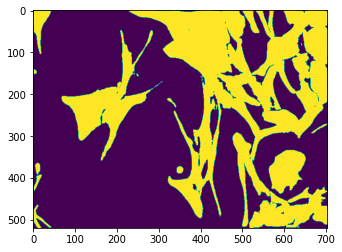

In [65]:
plt.imshow(stacked_mask[0])

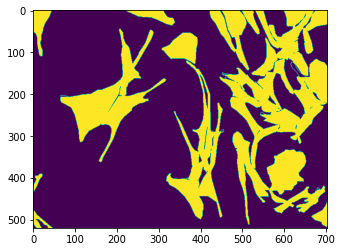

In [66]:
plt.imshow(all_val_mask[0])

In [67]:
iou_map(all_val_mask[0],stacked_mask[0])

0.31150864915562126

In [52]:
def compute_iou(labels, y_pred):
    """
    Computes the IoU for instance labels and predictions.

    Args:
        labels (np array): Labels.
        y_pred (np array): predictions

    Returns:
        np array: IoU matrix, of size true_objects x pred_objects.
    """

    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    # Compute intersection between all objects
    intersection = np.histogram2d(
        labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects)
    )[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins=true_objects)[0]
    area_pred = np.histogram(y_pred, bins=pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection
    iou = intersection / union
    
    return iou[1:, 1:]  # exclude background

def precision_at(threshold, iou):
    """
    Computes the precision at a given threshold.

    Args:
        threshold (float): Threshold.
        iou (np array [n_truths x n_preds]): IoU matrix.

    Returns:
        int: Number of true positives,
        int: Number of false positives,
        int: Number of false negatives.
    """
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1) >= 1  # Correct objects
    false_negatives = np.sum(matches, axis=1) == 0  # Missed objects
    false_positives = np.sum(matches, axis=0) == 0  # Extra objects
    tp, fp, fn = (
        np.sum(true_positives),
        np.sum(false_positives),
        np.sum(false_negatives),
    )
    return tp, fp, fn


def iou_map(truths, preds, verbose=0):
    """
    Computes the metric for the competition.
    Masks contain the segmented pixels where each object has one value associated,
    and 0 is the background.

    Args:
        truths (list of masks): Ground truths.
        preds (list of masks): Predictions.
        verbose (int, optional): Whether to print infos. Defaults to 0.

    Returns:
        float: mAP.
    """
    ious = [compute_iou(truth, pred) for truth, pred in zip(truths, preds)]
    
#     print(ious[0].shape)

    if verbose:
        print("Thresh\tTP\tFP\tFN\tPrec.")

    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        tps, fps, fns = 0, 0, 0
        for iou in ious:
            tp, fp, fn = precision_at(t, iou)
            tps += tp
            fps += fp
            fns += fn

        p = tps / (tps + fps + fns)
        prec.append(p)

        if verbose:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tps, fps, fns, p))

    if verbose:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))

    return np.mean(prec)

In [68]:
iou_bucket = []
for i in tqdm(range(len(all_val_img))):
    iou_bucket.append(iou_map(all_val_mask[i],stacked_mask[i]))

100%|██████████| 31/31 [00:15<00:00,  1.96it/s]


In [69]:
np.mean(iou_bucket)

0.27763641809423

In [ ]:
# 0.27770982543929473  --> without thresholds ->6th_epoch ->

In [ ]:
# 0.2657844273847701 -> with thresholds -> 6th_epoch ->0.285

In [ ]:
# 0.27763641809423  -> without threshold -> 5th epoch -> 0.233

In [ ]:
# 0.26764786298369153 -> with thresholds -> 6th_epoch -> 

# ways to solve the problem:
- change the threshold
- right now(only 6th epoch) its showing -ve corelation with LB. checking the 5th, if that turns out the same we need to assume the same that the cv is -ve corelated with LB. and check by submitting one.
- I will make the MS RCNN(with high epoch), PointRend, Cellpose in training and then start working on what other combination, we can use that for ensambling and TTA.
- Go back to MSRCNN/CASCADE MSRCNN with folds.
- hyperparameter tune the model config

In [ ]:
# import mmcv

# model = init_detector(cfg, '/kaggle/input/sartorius-mmdetection-training-1/finetune_output/epoch_6.pth')
# for file in sorted(os.listdir('../input/sartorius-cell-instance-segmentation/test')):
#     img = mmcv.imread('../input/sartorius-cell-instance-segmentation/test/' + file)
#     result = inference_detector(model, img)
#     show_result_pyplot(model, img, result)
#     bbox_result, segm_result = result
#     bboxes = np.vstack(bbox_result)
    
#     if isinstance(segm_result, tuple):
#         segm_result = segm_result[0]  # ms rcnn
        
#     labels = [
#         np.full(bbox.shape[0], i, dtype=np.int32)
#         for i, bbox in enumerate(bbox_result)
#     ]
    
#     labels = np.concatenate(labels)
    
#     segms = None
#     if segm_result is not None and len(labels) > 0:  # non empty
#         segms = mmcv.concat_list(segm_result)
#         if isinstance(segms[0], torch.Tensor):
#             segms = torch.stack(segms, dim=0).detach().cpu().numpy()
#         else:
#             segms = np.stack(segms, axis=0)
    
    
#     previous_masks = []
#     for thres,segs,lable in zip(bboxes[:,-1],segms,labels):
#         if thres >= confidence_thresholds[lable]:
#             mask = remove_overlapping_pixels(segs, previous_masks)
#             previous_masks.append(mask)
    
#     for mk in previous_masks:
#         rle_mask = rle_encoding(mk)
#         segms_pr.append(rle_mask)
#         files.append(str(file.split('.')[0]))

In [ ]:
# dgvadvfasdg

In [ ]:
# model = init_detector(cfg, '/kaggle/input/mrcnn-file-weights-mmdetection/epoch_6.pth')
# for file in sorted(os.listdir('/kaggle/input/sartorius-cell-instance-segmentation/test')):
#     img = mmcv.imread('/kaggle/input/sartorius-cell-instance-segmentation/test/' + file)
#     result = inference_detector(model, img)
#     show_result_pyplot(model, img, result)
#     previous_masks = []
#     for i, classe in enumerate(result[0]):
#         if classe.shape != (0, 5):
#             bbs = classe
# #             print(bbs.shape)
# #             break
# #         break
#     break
#             sgs = result[1][i]
#             for bb, sg in zip(bbs,sgs):
#                 box = bb[:4]
#                 cnf = bb[4]
#                 if cnf >= confidence_thresholds[i]:
#                     mask = get_mask_from_result(sg)
#                     plt.imshow(mask.get())
#                     break
#                     mask = remove_overlapping_pixels(mask, previous_masks)
#                     previous_masks.append(mask)

#     for mk in previous_masks:
#             rle_mask = rle_encoding(mk)
#             segms.append(rle_mask)
#             files.append(str(file.split('.')[0]))

In [ ]:
# cxdcdcvecesxcsedccxws asndjnas askbdjlas asjndkjabsdas dajbsdjbas

In [ ]:
# jsbjxbas sabdkabsd asbdkjabsd asdbaidbfdvfv zxcnzxc

In [ ]:
indexes = []
for i, segm in enumerate(segms_pr):
    if segm == '':
        indexes.append(i)

In [ ]:
for element in sorted(indexes, reverse = True):
    del segms_pr[element]
    del files[element]

In [ ]:
files = pd.Series(files, name='id')
preds = pd.Series(segms_pr, name='predicted')

In [ ]:
preds

In [ ]:
submission_df = pd.concat([files, preds], axis=1)

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head()

In [ ]:
shutil.rmtree('/kaggle/working/mmdetection')